In [483]:
import pandas as pd
import numpy as np

In [484]:
def filter_outliners(df, non_filtered_columns):
    for column in df.columns:
        if column in non_filtered_columns:
            continue
        # Identify the quartiles
        q1, q3 = np.percentile(df[column], [25, 75])
        # Calculate the interquartile range
        iqr = q3 - q1
        # Calculate the lower and upper bounds
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        # Drop the outliers
        df = df[(df[column] >= lower_bound) 
                        & (df[column] <= upper_bound)]
    return df 

In [485]:
##############################LOAD NORMAL TRAFFIC########################################

In [486]:
normal_traffic_df = pd.read_csv('vpn-pcap/big-normal-traffic.csv')
normal_traffic_df = normal_traffic_df.iloc[:, 1:]
print("Source normal traffic df length:", normal_traffic_df.shape[0])

Source normal traffic df length: 19667


In [487]:
# Filter by TLS
normal_traffic_df = normal_traffic_df[normal_traffic_df['Flow'].str.contains(':443')]

row_index_with_nan = normal_traffic_df[normal_traffic_df['min_interpacket_interval'].isna()].index
print("Number of row with NaN value:", len(row_index_with_nan))

Number of row with NaN value: 14


In [488]:
normal_traffic_df = normal_traffic_df.drop(row_index_with_nan, axis=0)
print("Normal traffic df length without NaN value:", normal_traffic_df.shape[0])

Normal traffic df length without NaN value: 5936


In [489]:
min(normal_traffic_df['min_interpacket_interval'])

-0.000213

In [490]:
normal_traffic_df = normal_traffic_df.drop(['Flow', 'Description'], axis=1)
normal_traffic_df = filter_outliners(normal_traffic_df, ['min_interpacket_interval', 'label'])
print(normal_traffic_df.shape[0])

2606


In [491]:
##############################LOAD V2RAYNG TRAFFIC########################################

In [498]:
v2rayng_traffic_df = pd.read_csv('vpn-pcap/v2rayng-vless-reality.csv')
v2rayng_traffic_df = v2rayng_traffic_df.iloc[:, 1:]
print("v2rayng traffic df length:", v2rayng_traffic_df.shape[0])

v2rayng traffic df length: 792


In [499]:
row_index_with_nan = v2rayng_traffic_df[v2rayng_traffic_df['min_interpacket_interval'].isna()].index
print("Number of row with NaN value:", len(row_index_with_nan))

Number of row with NaN value: 0


In [500]:
v2rayng_traffic_df = v2rayng_traffic_df.drop(row_index_with_nan, axis=0)
print("Normal traffic df length without NaN value:", v2rayng_traffic_df.shape[0])

Normal traffic df length without NaN value: 792


In [501]:
min(v2rayng_traffic_df['min_interpacket_interval'])

0.0

In [502]:
v2rayng_traffic_df = v2rayng_traffic_df.drop(['Flow', 'Description'], axis=1)
v2rayng_traffic_df = filter_outliners(v2rayng_traffic_df, ['min_interpacket_interval', 'label'])
print(v2rayng_traffic_df.shape[0])

429


In [419]:
##################################FILTER ROW############################################

In [420]:
normal_traffic_df = normal_traffic_df.sample(v2rayng_traffic_df.shape[0])
df = pd.concat([normal_traffic_df, v2rayng_traffic_df], ignore_index=True)
df.shape[0]

858

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   max_interpacket_interval  858 non-null    float64
 1   min_interpacket_interval  858 non-null    float64
 2   avg_interpacket_interval  858 non-null    float64
 3   sum_interpacket_interval  858 non-null    float64
 4   max_packet_length         858 non-null    int64  
 5   min_packet_length         858 non-null    int64  
 6   avg_packet_length         858 non-null    float64
 7   sum_packet_length         858 non-null    int64  
 8   mode_packet_length        858 non-null    int64  
 9   label                     858 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 67.2+ KB


In [422]:
df.describe()

,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0000
mean,11.534757,0.000004,0.759461,42.860112,1658.851981,55.993007,329.801871,14490.733100,60.0000
std,5.403148,0.000010,0.554882,53.576784,477.105570,2.915367,62.989856,8436.466413,6.0035
min,0.013095,0.000000,0.003552,0.064084,977.000000,54.000000,153.947368,3725.000000,54.0000
25%,8.959986,0.000000,0.305927,9.885587,1514.000000,54.000000,280.037582,7224.250000,54.0000
50%,14.782321,0.000001,0.630739,15.171130,1514.000000,54.000000,327.764706,13049.500000,60.0000
75%,15.079593,0.000002,1.131145,62.678877,1514.000000,60.000000,374.007665,19468.000000,66.0000
max,30.095221,0.000151,2.924710,244.549969,2962.000000,66.000000,556.142857,45552.000000,66.0000


In [423]:
y = df['label']
X = df.drop(['label'], axis=1)
print(y)

0      normal
1      normal
2      normal
3      normal
4      normal
        ...  
853       vpn
854       vpn
855       vpn
856       vpn
857       vpn
Name: label, Length: 858, dtype: object


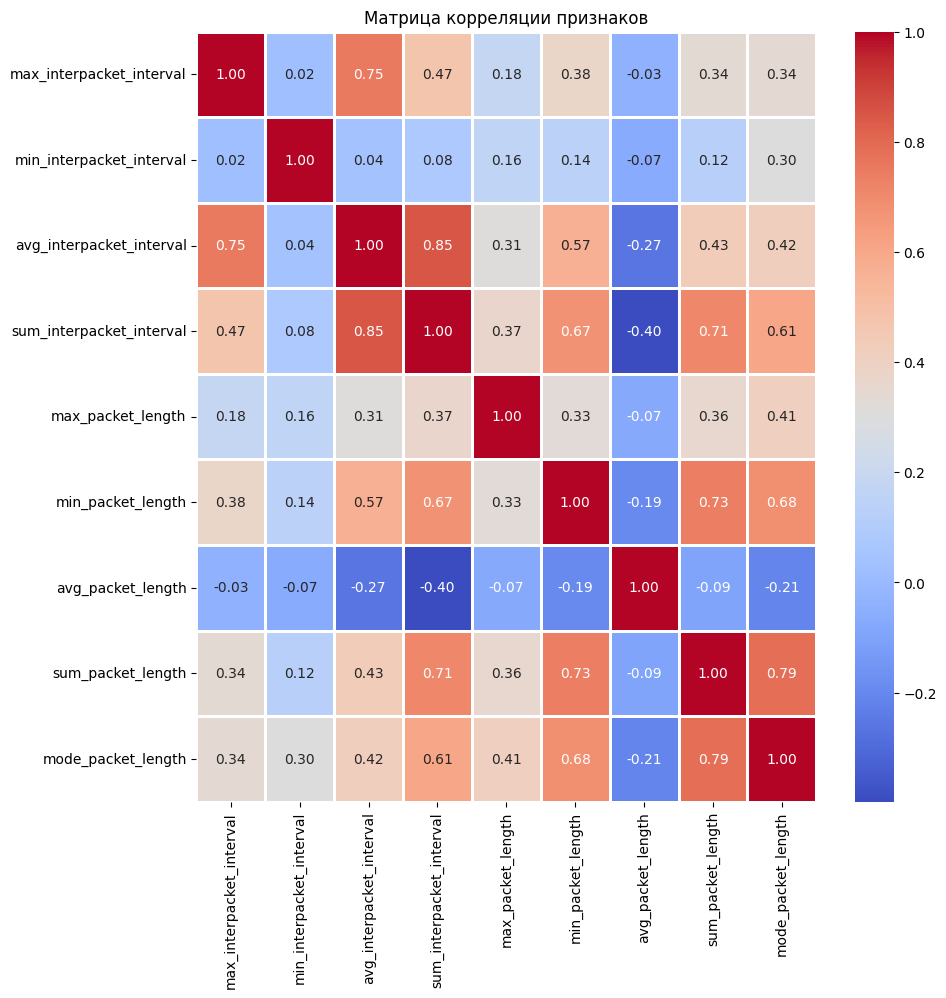

In [424]:
# Вычисление матрицы корреляции
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  linewidths=.80, fmt=".2f", annot_kws={"size": 10})
plt.title('Матрица корреляции признаков')
plt.show()

In [425]:
###############################EXTRACT MAIN INFO BY USING PCA##########################################

In [426]:
from sklearn.preprocessing import StandardScaler

In [427]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(X)
scaled_X=scaling.transform(X)

In [428]:
import matplotlib.pyplot as plt 

In [429]:
X_normal = scaled_X[y == 'normal']
X_vpn = scaled_X[y == 'vpn']
print(X_normal.shape[0], X_vpn.shape[0])

429 429


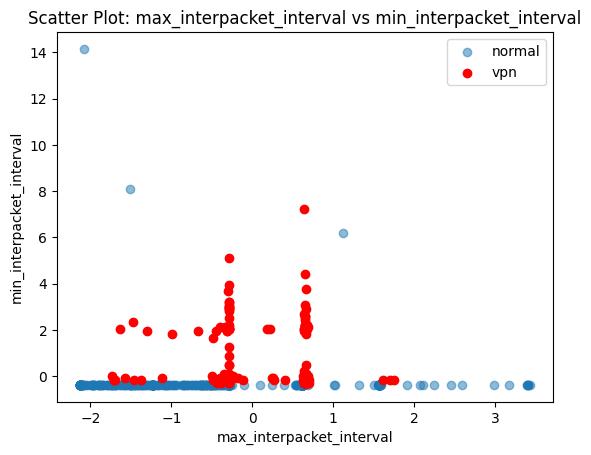

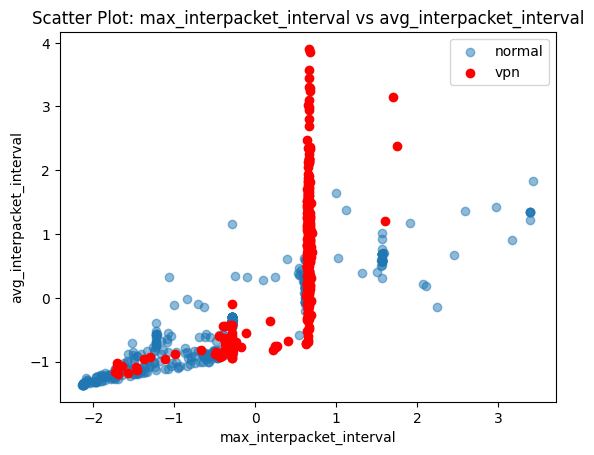

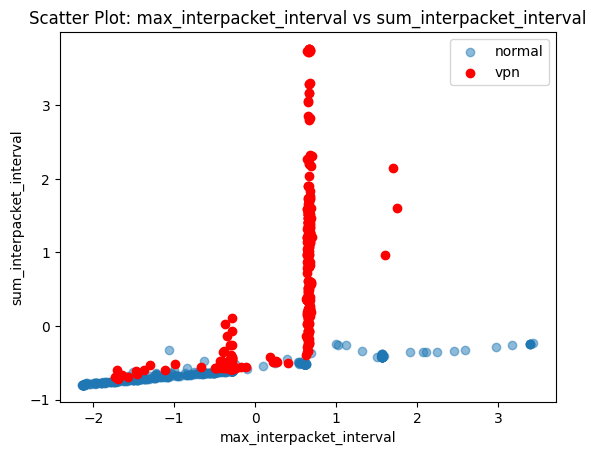

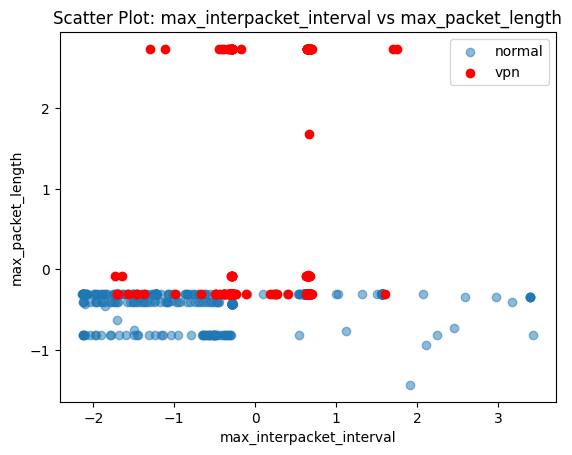

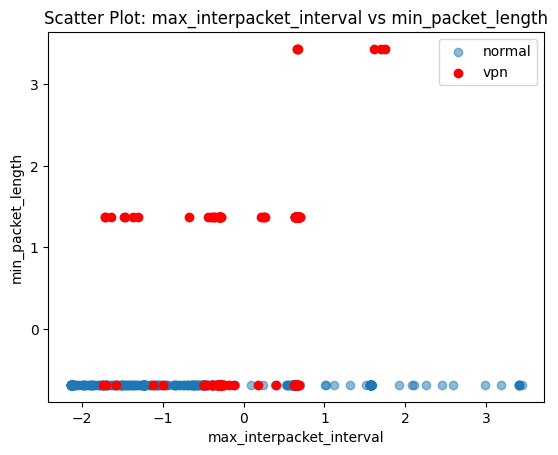

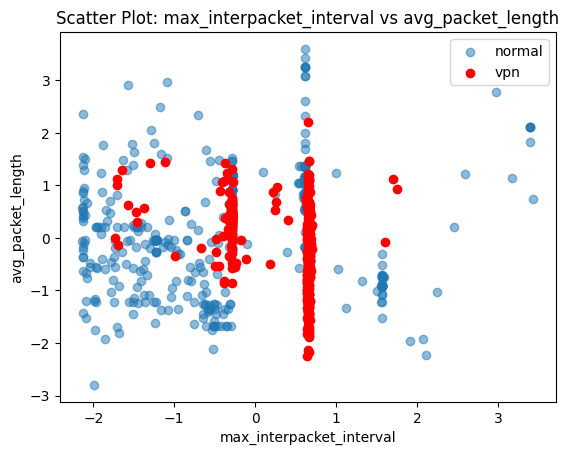

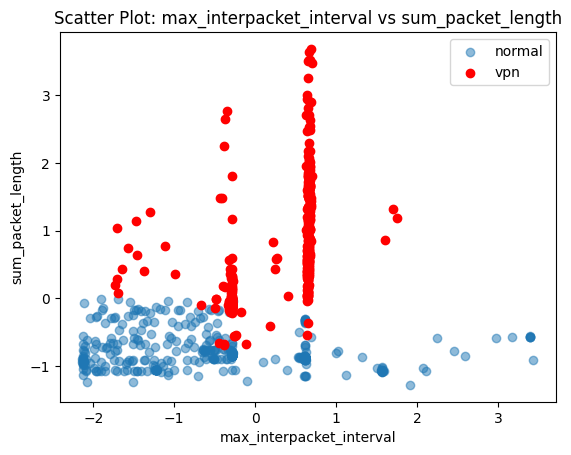

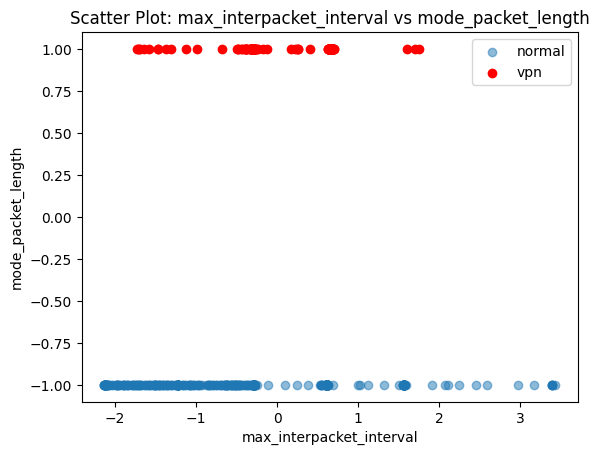

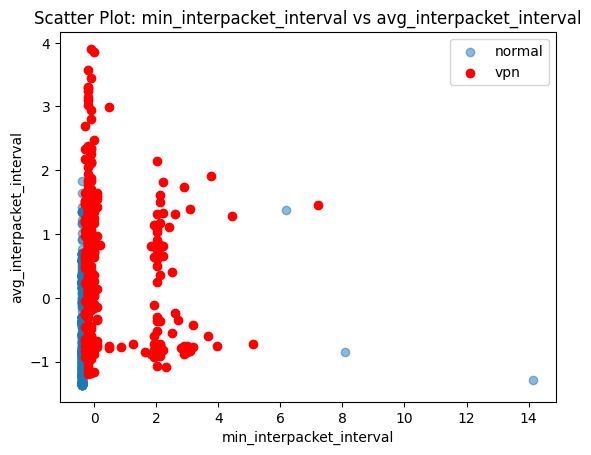

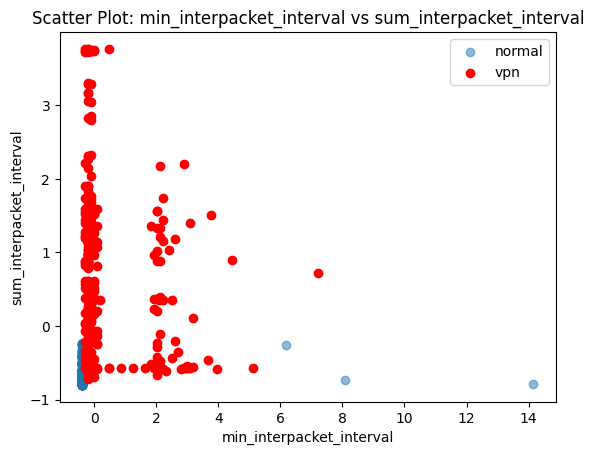

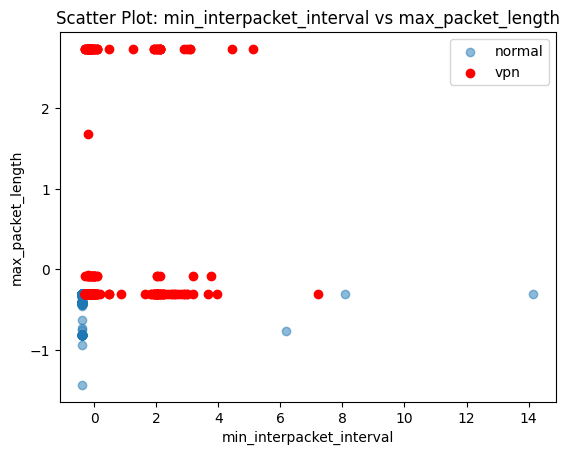

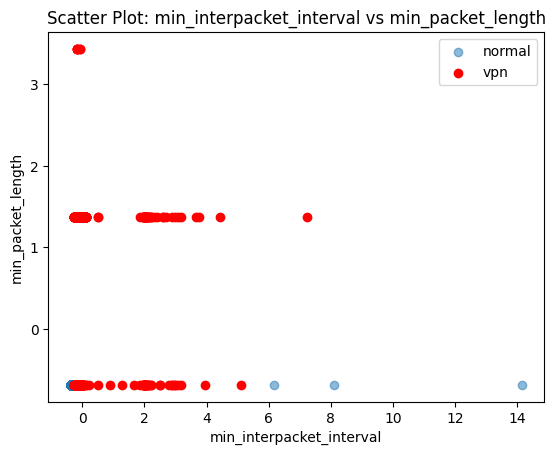

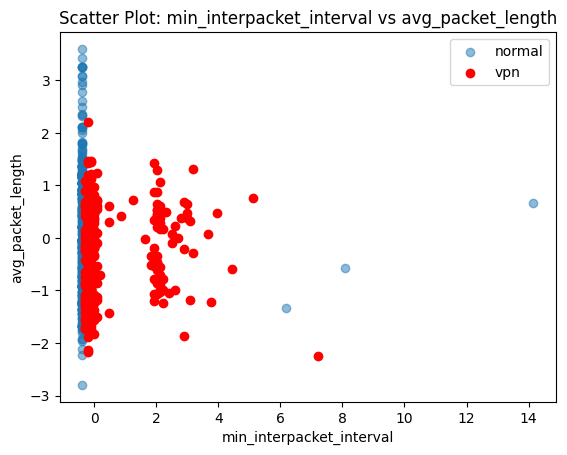

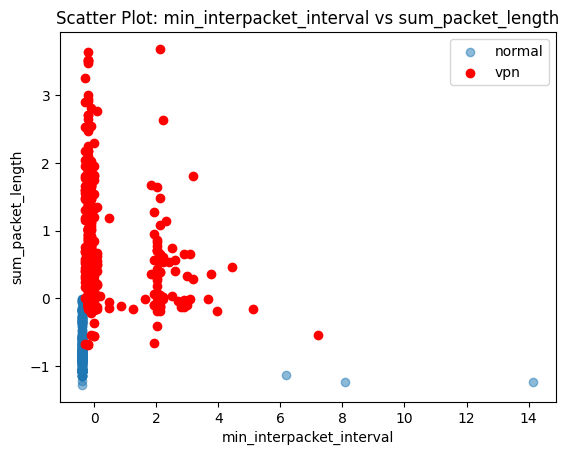

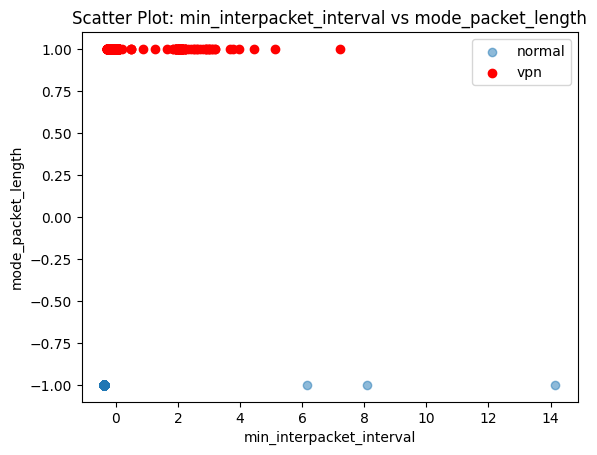

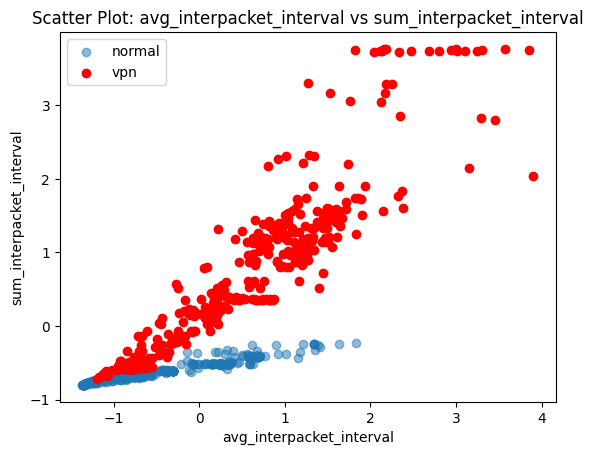

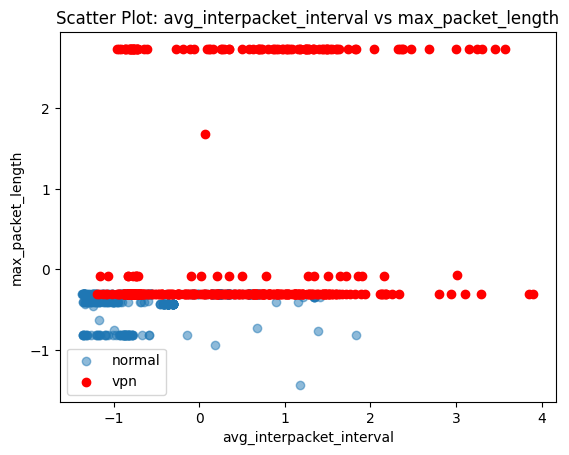

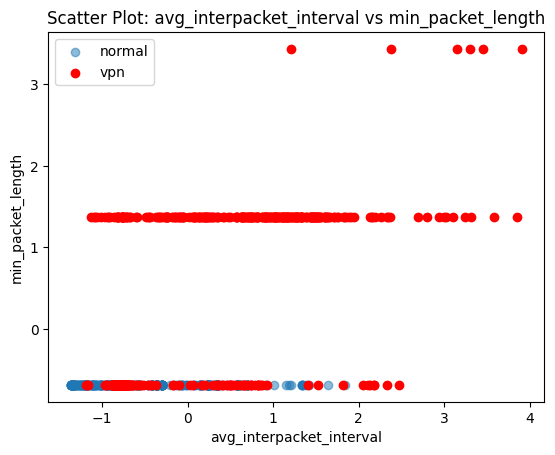

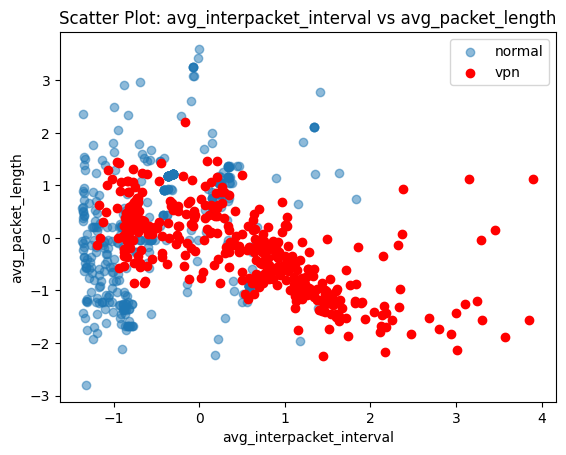

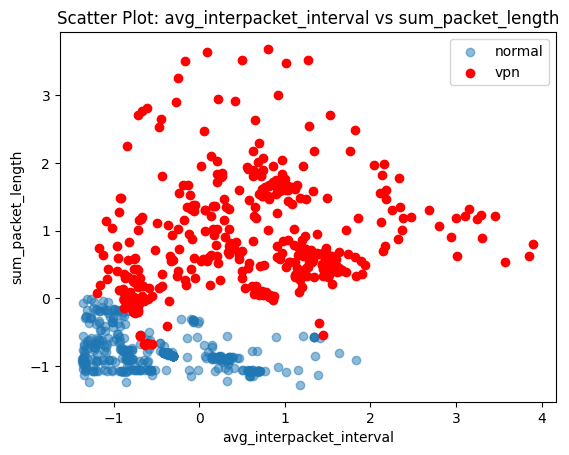

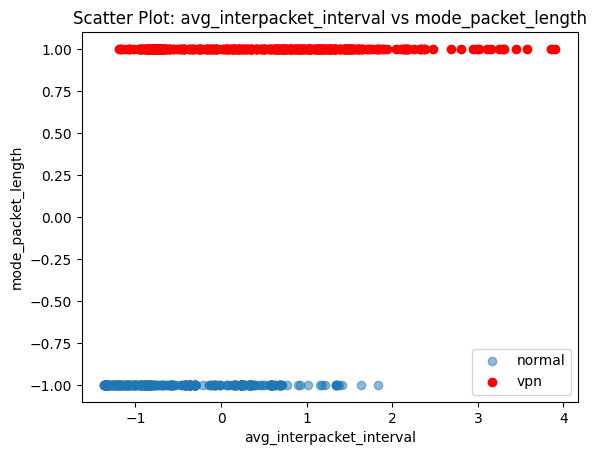

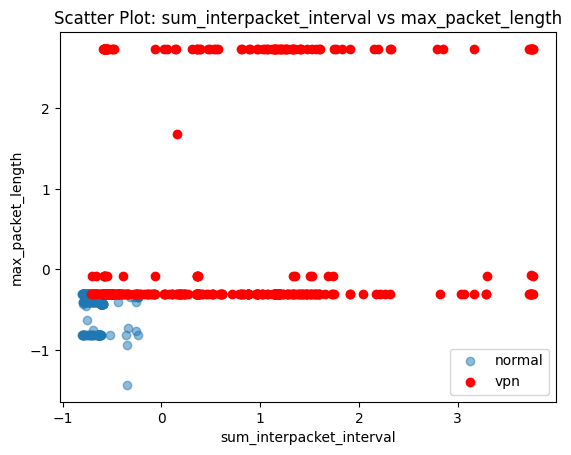

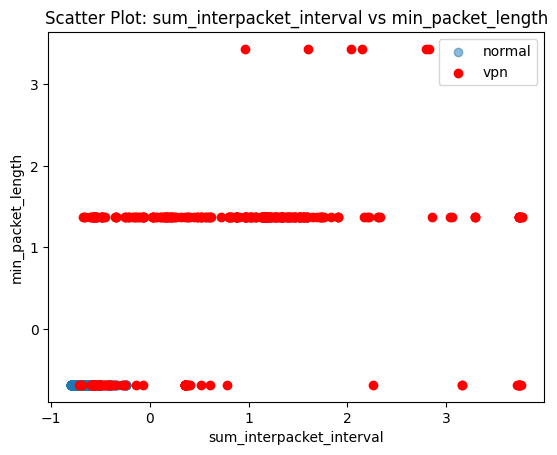

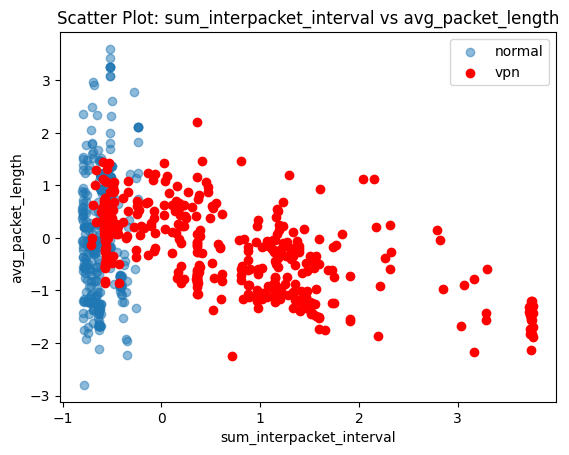

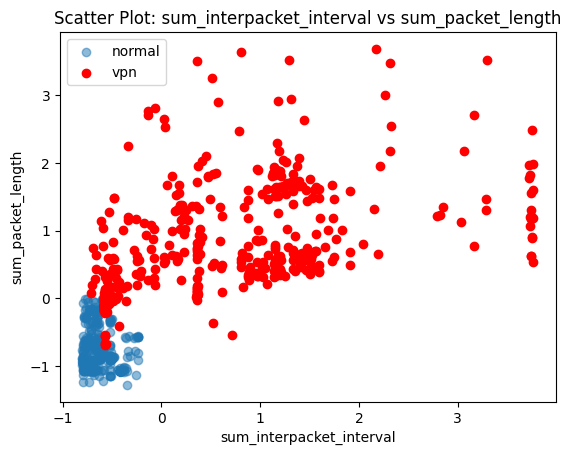

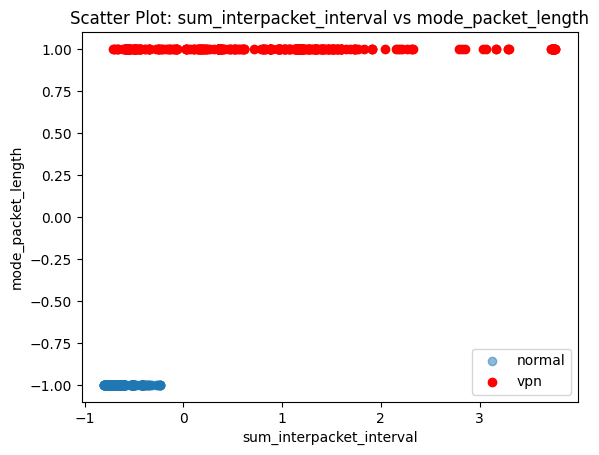

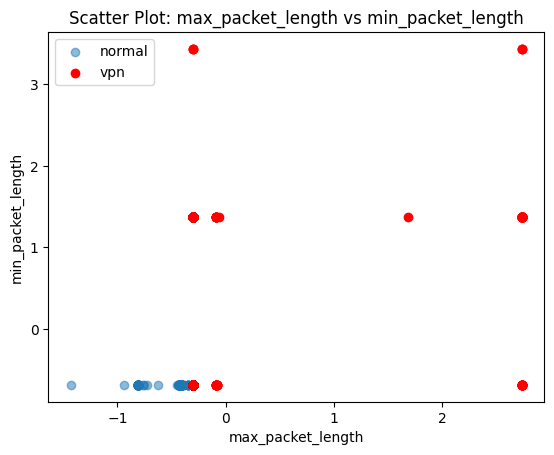

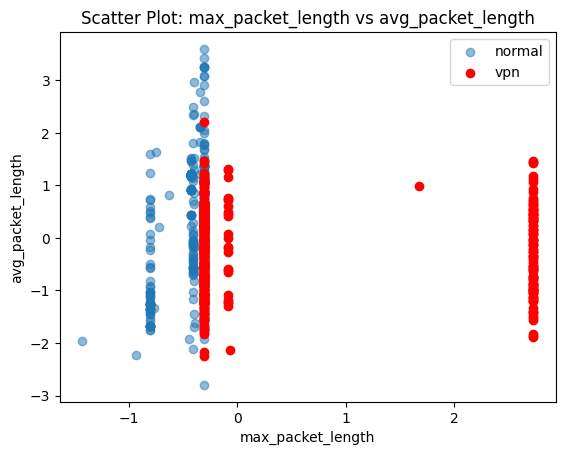

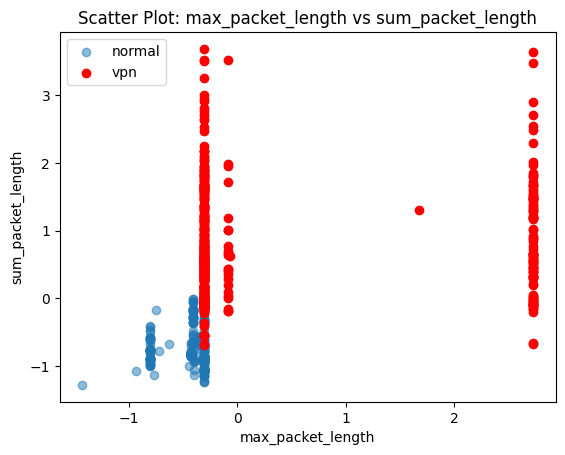

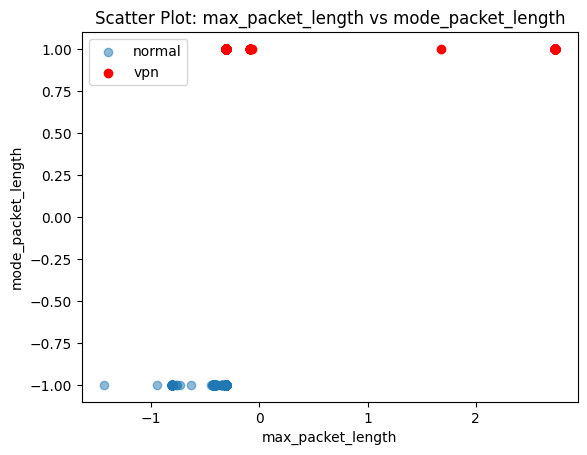

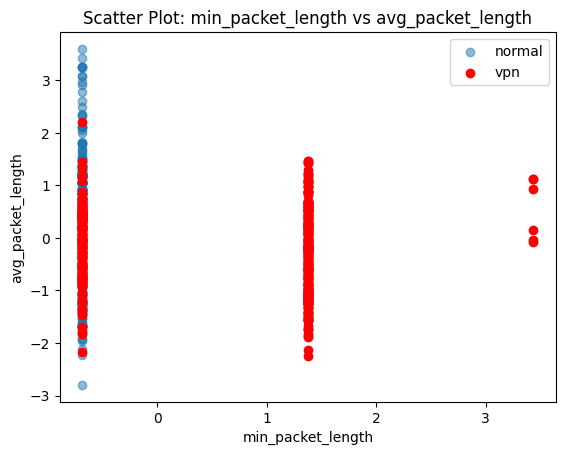

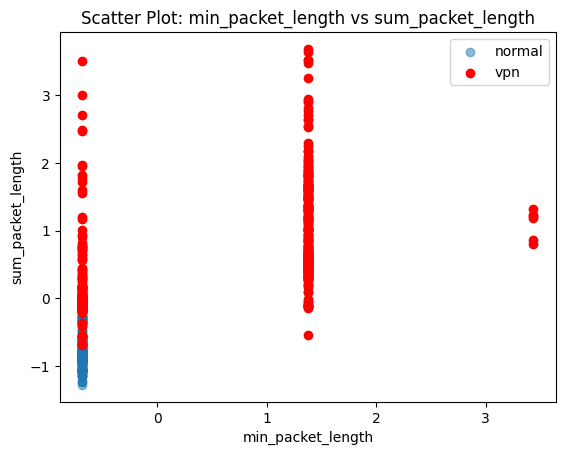

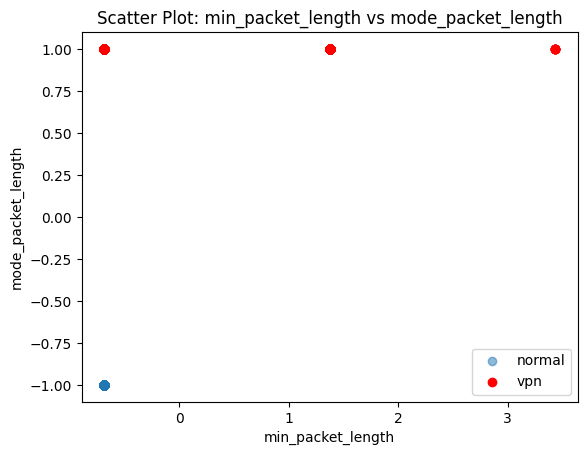

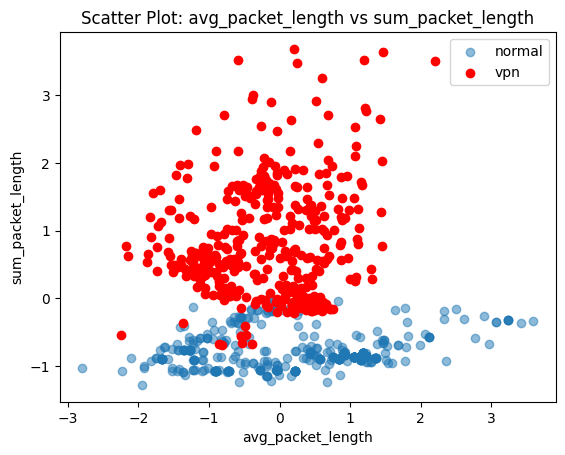

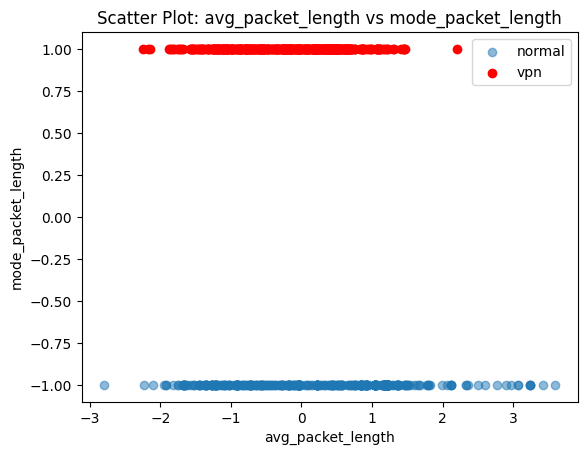

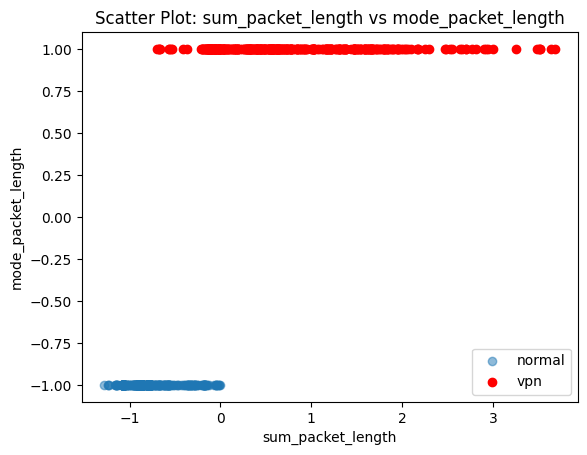

In [430]:
for i, column in enumerate(X.columns):
    for j in range(i + 1, len(X.columns)):
        x_normal = X_normal[:, i]
        y_normal = X_normal[:, j]

        x_vpn = X_vpn[:, i]
        y_vpn = X_vpn[:, j]

        # График разброса
        plt.scatter(x_normal, y_normal, alpha=0.5, label='normal')
        plt.scatter(x_vpn, y_vpn, c='red', marker='o', label='vpn')

        # Подпись осей и графика
        plt.xlabel(column)
        plt.ylabel(X.columns[j])
        plt.title(f'Scatter Plot: {column} vs {X.columns[j]}')

        plt.legend()
        plt.show()

In [431]:
##############################ICA######################################################################

In [432]:
from sklearn.decomposition import FastICA

In [433]:
n_components = 7
transformer = FastICA(n_components=n_components, whiten='unit-variance')
transformer = transformer.fit(X)
X_ica = transformer.transform(X)

/home/vladgud/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [434]:
##############################TRAIN####################################################################

In [435]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [523]:
def cross_validation(clf, X, y):
    skf = StratifiedKFold(n_splits=3)
    accuracy_scores = []
    clfs = []
    for train, test in skf.split(X, y):
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        clfs.append(clf)
    return accuracy_scores, clfs[max(enumerate(accuracy_scores),key=lambda x: x[1])[0]]

In [437]:
rfc = RandomForestClassifier(n_estimators=5)
accuracy_scores, _ = cross_validation(rfc, scaled_X, y)
print("RadnomForest:", np.mean(accuracy_scores), np.std(accuracy_scores), min(accuracy_scores), max(accuracy_scores))

RadnomForest: 1.0 0.0 1.0 1.0


In [438]:
X_values = X.values

In [439]:
rfc = RandomForestClassifier(n_estimators=5)
accuracy_scores, _ = cross_validation(rfc, X_values, y)
print("RadnomForest:", np.mean(accuracy_scores), np.std(accuracy_scores), min(accuracy_scores), max(accuracy_scores))

RadnomForest: 1.0 0.0 1.0 1.0


In [440]:
rfc = RandomForestClassifier(n_estimators=5)
accuracy_scores, _ = cross_validation(rfc, X_ica, y)
print("RadnomForest:", np.mean(accuracy_scores), np.std(accuracy_scores), min(accuracy_scores), max(accuracy_scores))

RadnomForest: 0.9976744186046511 0.004651162790697683 0.9883720930232558 1.0


In [441]:
###############################CREATE NEW TRAFFIC DATASET##################################################################

In [442]:
xray_youtube_df = pd.read_csv('vpn-pcap/xray-youtube.csv')
row_index_with_nan = xray_youtube_df[xray_youtube_df['min_interpacket_interval'].isna()].index
print("Number of row with NaN value:", row_index_with_nan.size)

Number of row with NaN value: 0


In [443]:
xray_y = xray_youtube_df['label']
xray_youtube_df = xray_youtube_df.drop(['Unnamed: 0', 'Flow', 'Description'], axis=1)
print(xray_youtube_df)

     max_interpacket_interval  min_interpacket_interval  \
0                   15.015806                  0.000000   
1                   15.015368                  0.000000   
2                   15.015908                  0.000000   
3                   15.012566                  0.000017   
4                   15.014118                  0.000000   
..                        ...                       ...   
124                  0.170167                  0.000000   
125                  0.166368                  0.000000   
126                  0.166154                  0.000000   
127                  0.299937                  0.000000   
128                  0.130564                  0.000000   

     avg_interpacket_interval  sum_interpacket_interval  max_packet_length  \
0                    1.671230               3111.829423               5353   
1                    1.025910               7730.228357                697   
2                    0.037558                247.810211  

In [444]:
small_normal_traffic_df = pd.read_csv('vpn-pcap/normal-traffic.csv')
# small_normal_traffic_df = small_normal_traffic_df[small_normal_traffic_df['Flow'].str.contains(':443')]
row_index_with_nan = small_normal_traffic_df[small_normal_traffic_df['min_interpacket_interval'].isna()].index
small_normal_traffic_df = small_normal_traffic_df.drop(row_index_with_nan, axis=0)
print("Normal traffic df length without NaN value:", small_normal_traffic_df.shape[0])

Normal traffic df length without NaN value: 295


In [445]:
small_normal_y = small_normal_traffic_df['label']
small_normal_traffic_df = small_normal_traffic_df.drop(['Unnamed: 0', 'Flow', 'Description'], axis=1)

In [446]:
validate_df = pd.concat([small_normal_traffic_df, xray_youtube_df], ignore_index=True)
validate_df.shape[0]
validate_y = validate_df['label']
validate_df = validate_df.drop(['label'], axis=1)

In [447]:
#########################################VALIDATE MODEL#################################################################

In [503]:
n_components = 4
transformer = FastICA(n_components=n_components, algorithm='deflation', fun='exp', whiten='unit-variance')
transformer = transformer.fit(scaled_X)
X_ica = transformer.transform(scaled_X)

In [565]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, criterion='entropy', max_features=2, min_samples_leaf=4, max_leaf_nodes=10)
rfc.fit(X_ica, y)
# accuracy_scores, rfc = cross_validation(rfc, X_ica, y)
# print("RadnomForest:", np.mean(accuracy_scores), np.std(accuracy_scores), min(accuracy_scores), max(accuracy_scores))

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=2,
                       max_leaf_nodes=10, min_samples_leaf=4, n_estimators=10)

In [566]:
import seaborn as sns
import matplotlib.pyplot as plt 

Accurancy: 0.7830188679245284


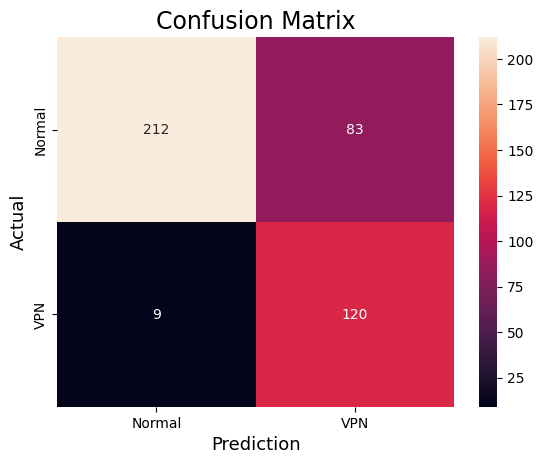

In [567]:
scaled_validate_df = scaling.transform(validate_df)
validate_ica = transformer.transform(scaled_validate_df)
y_pred = rfc.predict(validate_ica)
print("Accurancy:", accuracy_score(validate_y, y_pred))
cm = confusion_matrix(validate_y, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Normal','VPN'], yticklabels=['Normal','VPN'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [560]:
gboost = GradientBoostingClassifier(max_depth=2, learning_rate=0.0001, n_estimators=10)
gboost.fit(X_ica, y)
# accuracy_scores, gboost = cross_validation(gboost, X_ica, y)
# print("GradientBoostingClassifier:", np.mean(accuracy_scores), np.std(accuracy_scores), min(accuracy_scores), max(accuracy_scores))

GradientBoostingClassifier(learning_rate=0.0001, max_depth=2, n_estimators=10)

Accurancy: 0.7759433962264151


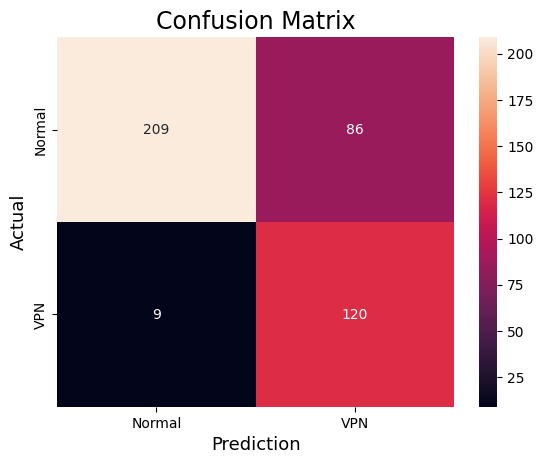

In [561]:
scaled_validate_df = scaling.transform(validate_df)
validate_ica = transformer.transform(scaled_validate_df)
y_pred = gboost.predict(validate_ica)
print("Accurancy:", accuracy_score(validate_y, y_pred))
cm = confusion_matrix(validate_y, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Normal','VPN'], yticklabels=['Normal','VPN'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [546]:
from xgboost import XGBClassifier

In [547]:
gboost = XGBClassifier(max_depth=4, n_estimators=30)
y_label = y.copy()
y_label = y_label.replace({"vpn":1, "normal":0 })
accuracy_scores, xgboost = cross_validation(gboost, X_ica, y_label)
print("XGBClassifier:", np.mean(accuracy_scores), np.std(accuracy_scores), min(accuracy_scores), max(accuracy_scores))

XGBClassifier: 0.9988344988344989 0.0016482675552134203 0.9965034965034965 1.0


Accurancy: 0.7712264150943396


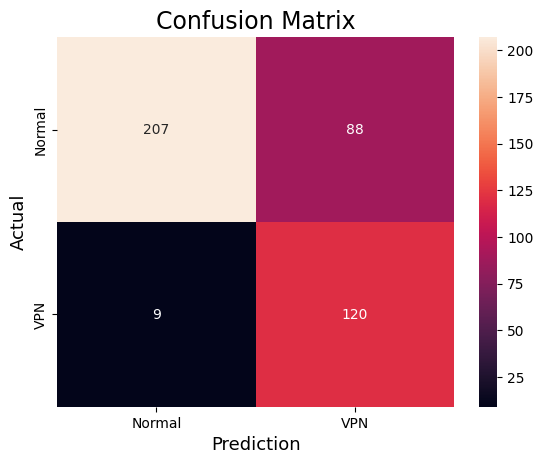

In [548]:
validate_xgb_y = validate_y.copy().replace({"vpn":1, "normal":0 })
scaled_validate_df = scaling.transform(validate_df)
validate_ica = transformer.transform(scaled_validate_df)
y_pred = gboost.predict(validate_ica)
print("Accurancy:", accuracy_score(validate_xgb_y, y_pred))
cm = confusion_matrix(validate_xgb_y, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Normal','VPN'], yticklabels=['Normal','VPN'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()